<a href="https://colab.research.google.com/github/MirandaCarou/Quantum_Algorithims_Programming/blob/main/Deutsch-Jozsa_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIRANDA CAROU LAIÑO**

---



In [1]:
# Instalamos qiskit en el notebook
!pip install qiskit qiskit-aer pylatexenc

In [2]:
# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
import numpy as np
from math import sqrt

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
# import basic plot tools
from qiskit.visualization import plot_histogram

# Funciones auxiliares

# Función para simular y mostrar el vector de estado
def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    # Usamos el simulador de vector de estado
    # https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

# Funcion para obtener y mostrar la matriz unitaria
def obten_unitaria(qcirc, etiqueta):
    # Usamos el simulador de matriz unitaria
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

# Práctica 2: algoritmo de  Deutsch-Jozsa

Implementa en Qiskit el algoritmo de Deutsch-Jozsa para un $n$ arbitrario.
Es igual que el algoritmo Deutch pero para muchos n
Pasos:

1. Crea una función que devuelva un oráculo para $f$ constante.

In [4]:
def cte_oraculo(n):
    """
    Define un oraculo para una función constante de n bits
        return: circuito de n+1 cúbits en forma de puerta
    """
    # TODO: Define el oráculo
    x = QuantumRegister(n, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)
    qc.x(y)
    oraculo = qc.to_gate()
    oraculo.name = "$U_{constante}$"
    return(oraculo)

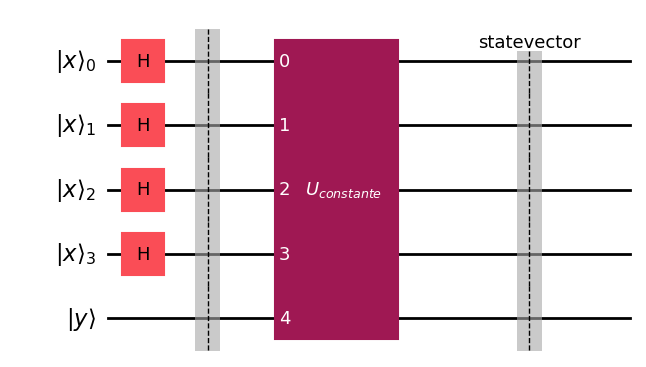

In [5]:
#Funcion que implementa el oraculo de la paridad
n= 4
x = QuantumRegister(n, name="|x\\rangle")
y = QuantumRegister(1, name="|y\\rangle")
qc = QuantumCircuit(x,y)
qc.h(x)
qc.barrier()

qc = qc.compose(cte_oraculo(n))
qc.save_statevector()
qc.draw(output='mpl')

2. Crea una función que devuelva un oráculo para $f$ balanceada.

In [6]:
def bal_oraculo(n):
    """
    Define un oraculo para una función balanceada de n bits
        return: circuito de n+1 cúbits en forma de puerta
    """
    x = QuantumRegister(n, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)
    qc.cx(x[n-1], y)
    oraculo = qc.to_gate()
    oraculo.name = "$U_{balanceada}$"
    # TODO: Define el oráculo
    # El más simple se puede implementar con CNOTS,
    # de forma que f(x) = 0 si x tiene paridad par (nº de bits 1 par) o 1 en otro caso.

    # Salida
    return oraculo


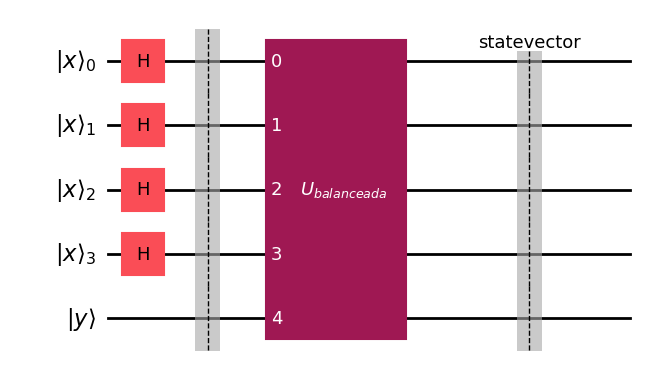

In [7]:

#Funcion que implementa el oraculo de la paridad
x = QuantumRegister(n, name="|x\\rangle")
y = QuantumRegister(1, name="|y\\rangle")
qc = QuantumCircuit(x,y)
qc.h(x)
qc.barrier()
qc.draw(output='mpl')

qc = qc.compose(bal_oraculo(n))
qc.save_statevector()
qc.draw(output='mpl')

3. Crea una función que devuelva una puerta oráculo cte. o balanceado según un parámetro de entrada

In [8]:
def dj_oraculo(n, tipo):
    """
    Devuelve un oraculo para el algoritmo de Deutsch-Jozsa

        n: Número de cúbits de entrada
        tipo: tipo de oráculo, 0 cte., 1 balanceado
        return: circuito de n+1 cúbit en forma de puerta
    """
    x = QuantumRegister(n, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)

    if tipo == 0:
      oraculo = qc.compose(cte_oraculo(n), inplace=True)
    else:
      oraculo = qc.compose(bal_oraculo(n), inplace=True)

    # Salida
    oraculo = qc.to_gate()
    oraculo.name = "$U_{dj_ORACULO}$"
    return oraculo

4. Implementa paso a paso el circuito completo del algoritmo de Deutsch-Jozsa:

Paso 0: Obtén el estado inicial:
        
$$\vert \psi_0 \rangle = \vert 1\rangle\vert0\rangle^{\otimes n} $$

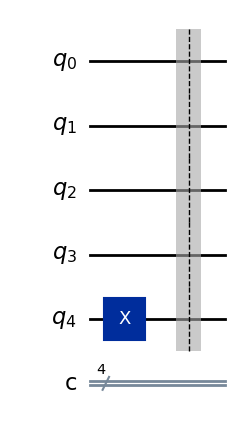

In [9]:
def paso_0(n):
    qc = QuantumCircuit(n+1,n)

    #
    # TODO: Añade las puertas necesarias para obtener el estado 𝜓0
    #
    qc.x(n)
    qc.barrier()
    return qc

# Mostramos el circuito
paso_0(n).draw('mpl')

Paso 1: Obtén el estado
$$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \left(|0\rangle - |1 \rangle \right)\vert x\rangle $$

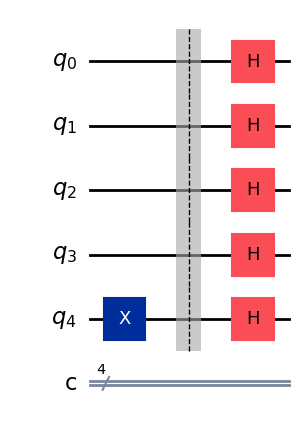

In [10]:
def paso_1(n):
    qc = paso_0(n)
    qc.h(range(n))
    qc.h(n)
    return qc

# Mostramos el circuito
paso_1(n).draw('mpl')

Paso 2: Añadimos el oráculo para obtener:

$$
\lvert \psi_2 \rangle  
= \frac{|0\rangle - |1\rangle}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle  
$$

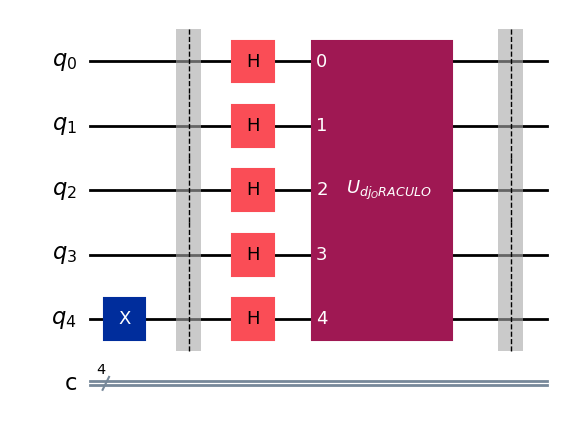

In [11]:
def paso_2(n, tipo_oraculo):
    qc = paso_1(n)

    # Añadimos barreras para una mejor visualización
    qc = qc.compose(dj_oraculo(n, tipo_oraculo))
    qc.barrier()

    return qc

# Mostramos el circuito
paso_2(n, 0).draw('mpl')

Paso 3: Añade las últimas puertas H y la medida de los $n$ primeros cúbits.

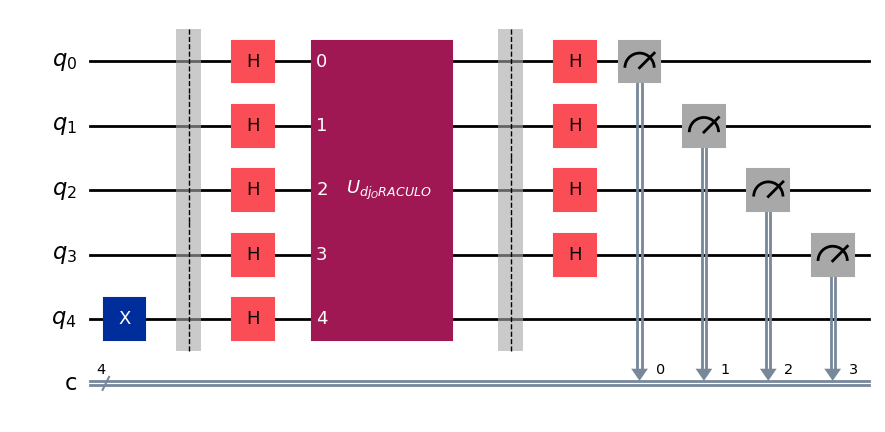

In [12]:
def paso_3(n, tipo_oraculo):
    qc = paso_2(n, tipo_oraculo)
    #
    # TODO: Añade las puertas H y la medida
    #
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

# Selecciona un oráculo aleatorio
tipo_oraculo = 1
dj_circuito = paso_3(4, tipo_oraculo)
dj_circuito.draw('mpl')

Simulamos el circuito y obtenemos un histograma de la salida:

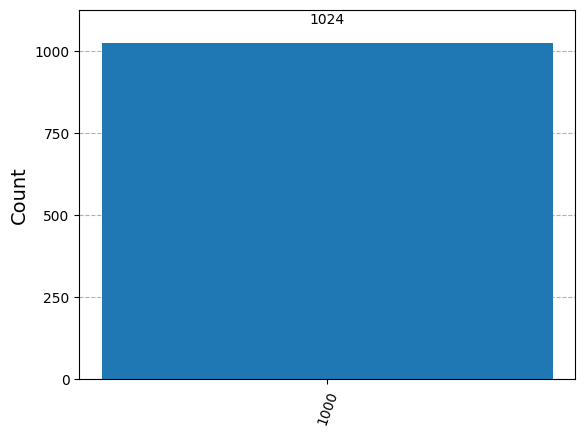

In [16]:
# Usamos Aer
sim = AerSimulator(method='automatic')
qc_obj = transpile(dj_circuito, sim)
result = sim.run(qc_obj, shots=1024).result()
salida = result.get_counts()
plot_histogram(salida)

Verifica que si el oráculo es constante, la salida es 0, y si es balanceado es $\ne 0$.

-----------------------------
-----------------------------
-----------------------------

In [19]:
#Algoritmo de Deutch-Jozsa juntito mejoricuto

def algoritmo_deutch_jozsa(n, tipo_oraculo):
    qc.x(n)
    qc.barrier()

    qc = paso_0(n)
    qc.h(range(n))
    qc.h(n)

    qc = qc.compose(dj_oraculo(n, tipo_oraculo))
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

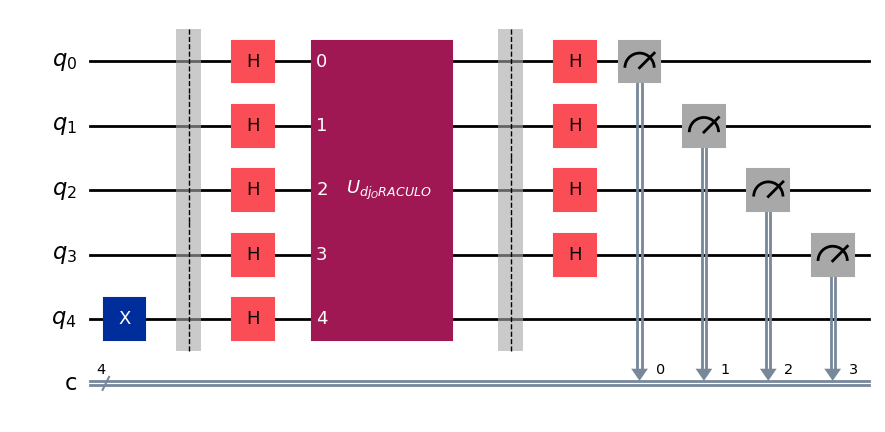

In [23]:
tipo_oraculo = 0
dj_circuito = paso_3(4, tipo_oraculo)
dj_circuito.draw('mpl')

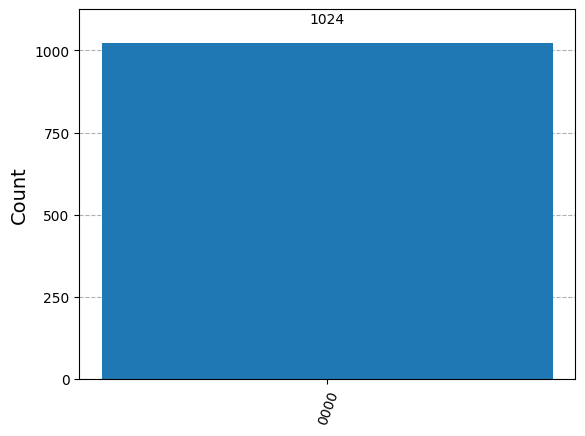

In [22]:

sim = AerSimulator(method='automatic')
qc_obj = transpile(dj_circuito, sim)
result = sim.run(qc_obj, shots=1024).result()
salida = result.get_counts()
plot_histogram(salida)